/home/boydjo/miniforge3/envs/amuse-env/lib/python3.12/site-packages/amuse/support/options.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


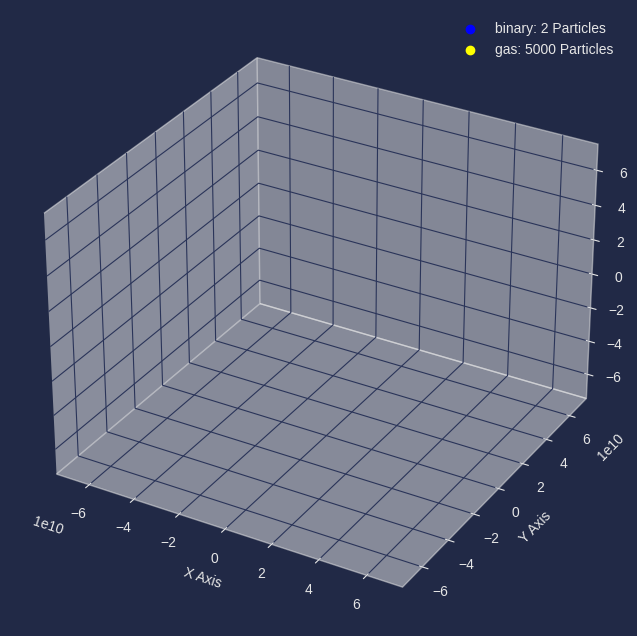

In [1]:
%load_ext autoreload
%autoreload 2

from utils.imports import *
from utils.plotting import *
from utils.config import DEFAULT_CONFIG as cfg
from utils.binary import get_blackhole_binary
from utils.star import evolve_star, relax_sph_realization
from amuse.ext.sink import new_sink_particles

%reload_ext autoreload 
%autoreload 2
%matplotlib inline
quantity_support()

@contextlib.contextmanager
def suppress_print():
    with open(os.devnull, "w") as f, contextlib.redirect_stdout(f):
        yield
        
file =  read_set_from_file("Lady_Tramp_70_30_0.hdf5")
# "Lady_Tramp_40_60_0.hdf5", "Lady_Tramp_40_60_05pi.hdf5","Lady_Tramp_40_60_pi.hdf5","Lady_Tramp_40_60_15pi.hdf5"
# "Lady_Tramp_50_50_0.hdf5", "Lady_Tramp_50_50_05pi.hdf5","Lady_Tramp_50_50_pi.hdf5","Lady_Tramp_50_50_15pi.hdf5"
# "Lady_Tramp_70_30_0.hdf5", "Lady_Tramp_70_30_05pi.hdf5","Lady_Tramp_70_30_pi.hdf5","Lady_Tramp_70_30_15pi.hdf5"

lx,ly,lz = map(lambda i: i.as_astropy_quantity(), [(-0.5,0.5)|u.AU, (-0.5,0.5)|u.AU, (-0.5, 0.5)|u.AU])
pad = 0.1 * max(lx[1]-lx[0], ly[1]-ly[0], lz[1]-lz[0])
color_map = {'binary': 'blue', 'gas': 'yellow'}
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
ax.axis('equal')
ax.axes.set(
    xlabel= 'X Axis', ylabel='Y Axis', zlabel = 'Z Axis',
    xlim = lx, ylim=ly, zlim=lz )
# plt.axis("off")


scatter_objs = {}
for key in file.keys():
    label = f"{key}: {len(file[key])} Particles"
    scatter_objs[key], = ax.plot(
        [], [], [], "o",
        color=color_map[key],
        label=label
    )

ax.legend()

def init():
    for key in scatter_objs:
        scatter_objs[key].set_data([],[])
        scatter_objs[key].set_3d_properties([])
    
    return scatter_objs.values(),

def update(frame):
    for key in scatter_objs:
        state = file[key].get_state_at_timestamp(frame)
        x,y,z = state.position.as_astropy_quantity().T
        scatter_objs[key].set_data(x,y); scatter_objs[key].set_3d_properties(z)
    # ax.set_title(f"time {frame.value_in(u.s)}")
    return scatter_objs.values(),

# Create the animation

ani = FuncAnimation(
    fig, update, frames=[i.get_timestamp().as_quantity_in(u.s) for i in file['gas'].history if i.get_timestamp() is not None]
,init_func=init, interval=100, blit=False
)

ani.save("Lady_Tramp_70_30_0.mp4", fps=30, dpi=150)
#"Lady_Tramp_40_60_0.mp4" "Lady_Tramp_40_60_05pi.mp4" "Lady_Tramp_40_60_pi.mp4"  "Lady_Tramp_40_60_15pi.mp4"
#"Lady_Tramp_50_50_0.mp4" "Lady_Tramp_50_50_05pi.mp4" "Lady_Tramp_50_50_pi.mp4" "Lady_Tramp_50_50_15pi.mp4"
# "Lady_Tramp_70_30_0.mp4" "Lady_Tramp_70_30_05pi.mp4" "Lady_Tramp_70_30_pi.mp4" "Lady_Tramp_70_30_15pi.mp4"